In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\USER\Downloads\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# VISUALISATION

In [9]:
import seaborn as sns

the correlation is : 0.9012079133023305


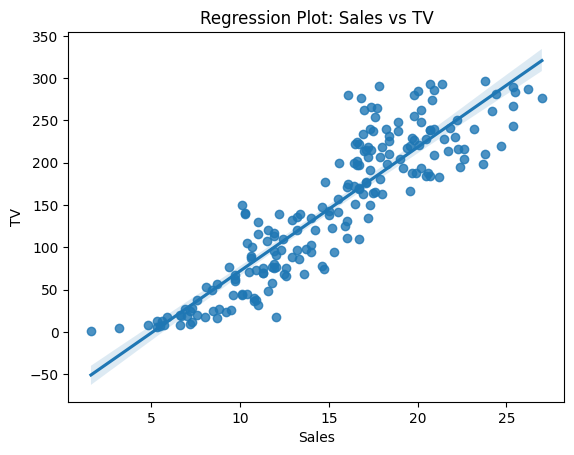

the correlation is : 0.3496310970076693


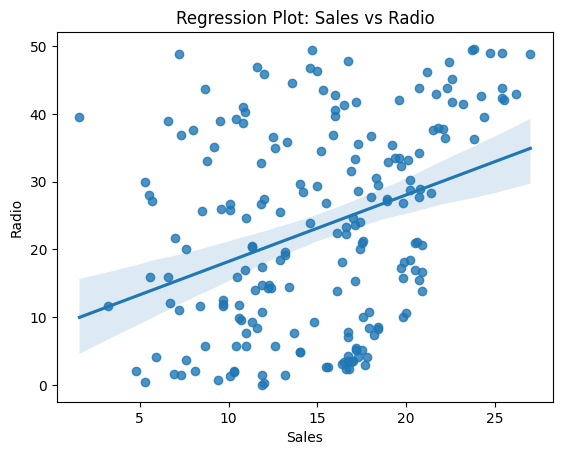

the correlation is : 0.1579600261549263


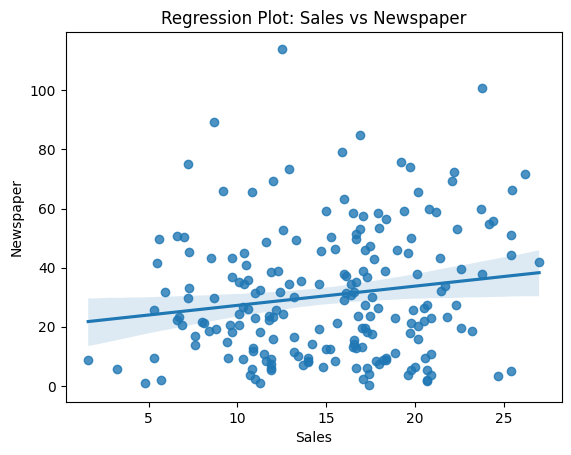

In [18]:
col=df.columns.tolist()
for i in col[0:-1]:
    print("the correlation is :",df["Sales"].corr(df[i]))
    sns.regplot(x=df["Sales"],y=df[i])
    plt.xlabel("Sales")
    plt.ylabel(i)
    plt.title(f"Regression Plot: Sales vs {i}")
    plt.show()

## HEATmap

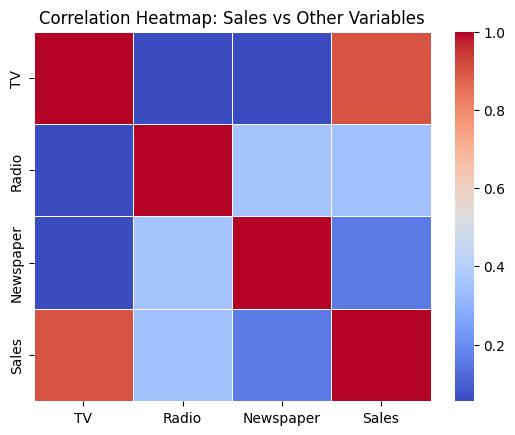

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap: Sales vs Other Variables")
plt.show()

# NOTE
### We notice that there is not a strong correlation between ("Radio ","News Paper") and Sales while there is a strong one with th TV column . so thes what we will use in the modeling.


# MODELING

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
x=df[["TV"]]
y=df["Sales"]
scaler= StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(x_test)

# Evaluation:

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 6.1010729067739655
R-squared: 0.802561303423698
